# Part II - (Loan dataset EDA)
## by (Augustine Ugbeda)





## Investigation Overview


I am interested in how employment status and debtToIncome ratio associates with various variables in the dataset.and what features affect Annual Percentage Rate (APR)


January has the highest number of loans listed as expected from starting of new year , whereas april sees the least number of loans listed. 

The distribution of APR looks multimodal. A small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very shape peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.

The loan original amount is positively correlated with the stated monthly income with a coefficient of 0.18,The correlation coefficient of borrower APR and loan original amount is -0.426, these two variables are also negatively correlated when we look at the scatter plot, which agrees with the assumption that the more the loan amount, the lower the APR.

The borrower APR decreases with the increasingly better rating. Borrowers with the best Prosper ratings have the lowest APR. It means that the Prosper rating has a strong effect on borrower APR.


## Dataset Overview

Original dataset contains 113,937 loans with 81 variables on each loan which was reduced to 84853 loans with 21 columns, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
loan_main = pd.read_csv('loan_main.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of borrower Apr

APR distribution is multimodal.Only very few loans have APR greater than 0.4.we have a very shape peak between 0.35 and 0.36 and small peaks centered around 0.1, 0.2, 0.3 respectively.



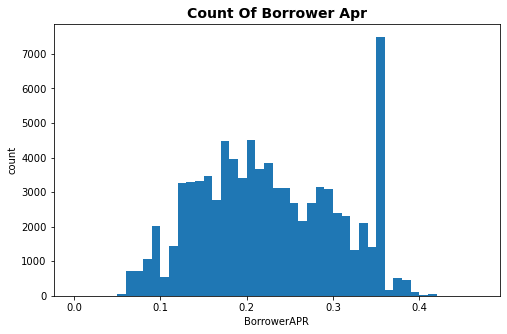

In [3]:
def histogram(x,binsize,bz,title):
    b = np.arange(0, loan_main[x].max()+binsize, bz)
    plt.figure(figsize=[8, 5])
    plt.hist(data = loan_main, x=x , bins = b)
    plt.xlabel(x)
    plt.ylabel("count")
   
    plt.title(f'count of {title}'.title(),fontsize=14,weight="bold")
    
histogram('BorrowerAPR',0.05,0.01, 'Borrower APR')

## BoxPlot of Loan status and Borrow rate
the means for the borrow rate of late loans are around 0.25 while that of problematic loans are closer to 0.2 and that of completed loans is less than 0.2 percent

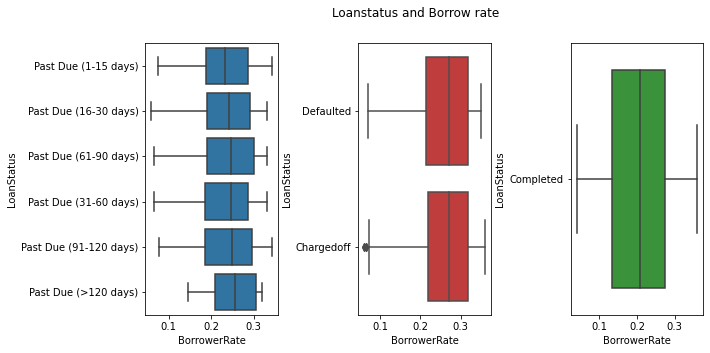

In [4]:
#subsetting the loans into groups
loan_good= loan_main[loan_main['LoanStatus'].str.contains('Completed|Current|Final')]
loan_bad= loan_main[~loan_main['LoanStatus'].str.contains('Completed|Current|Final')]
#further subseting
loan_completed=loan_good[loan_good['LoanStatus'].str.contains('Completed')]
loan_problem= loan_bad[loan_bad['LoanStatus'].str.contains('Defaulted|Chargedoff|Cancelled')]
loan_late=loan_bad[~loan_bad['LoanStatus'].str.contains('Defaulted|Chargedoff|Cancelled')]
#comparing problematic loans and loans that are late in payment and completed loans
default_color = sns.color_palette()[0]
plt.figure(figsize=[10,5])
plt.subplots_adjust(wspace=0.6)
plt.subplot(1,3,1)
sns.boxplot(data=loan_late,y="LoanStatus",x="BorrowerRate",color=default_color)
plt.subplot(1,3,2)
sns.boxplot(data=loan_problem,y="LoanStatus",x="BorrowerRate",color=sns.color_palette()[3])
plt.subplot(1,3,3)
sns.boxplot(data=loan_completed,y="LoanStatus",x="BorrowerRate",color=sns.color_palette()[2])
plt.suptitle('Loanstatus and Borrow rate');

## Loan frequecy by month
January has the most number of loans,as expected since it is the begining of the year.while april happes to be the month with less loans



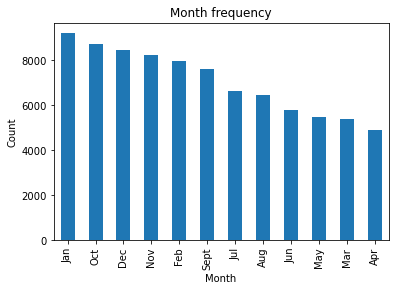

In [5]:
#plotting bar charts that shows hometeam wins,away team wins and draws
loan_main['month'].value_counts().plot.bar()
plt.title('Month frequency')
plt.ylabel('Count')
plt.xlabel('Month');

### Borrower APR across rating and term
from the chart,we can see that there is decrease in the the borrower APR  with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, they is the APR increase with the increase of borrow term.

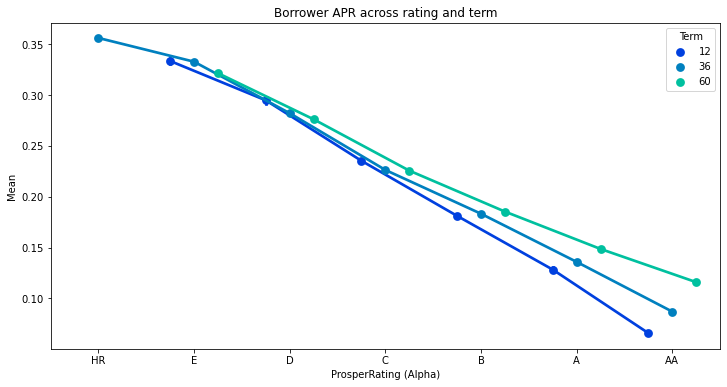

In [6]:


order = ['HR','E','D','C','B','A','AA']
ordered = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = order)
loan_main['ProsperRating (Alpha)'] = loan_main['ProsperRating (Alpha)'].astype(ordered)
fig = plt.figure(figsize = [12,6])
s= sns.pointplot(data = loan_main, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'winter',dodge = 0.5).set(title='Borrower APR across rating and term')

plt.ylabel('Mean');

### Correlation Heat Map
The loan original amount is positively correlated with the stated monthly income with a coefficient of 0.18,The correlation coefficient of borrower APR and loan original amount is -0.426

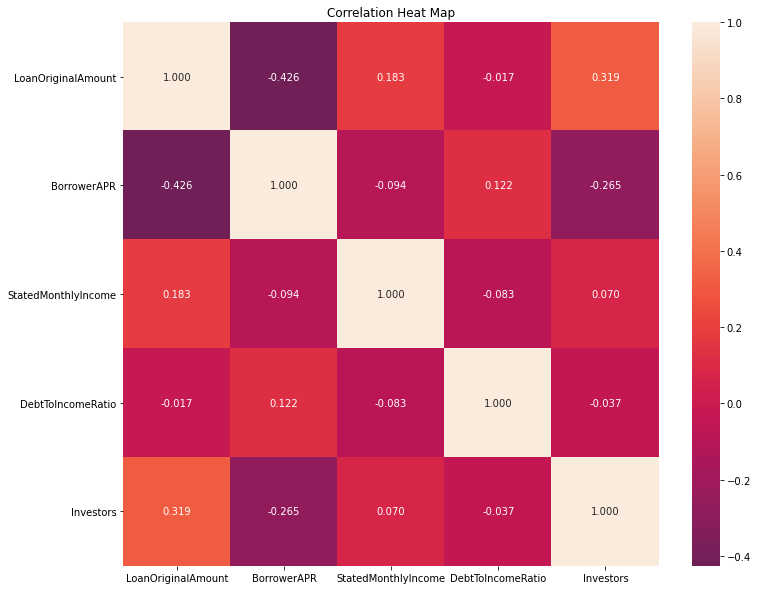

In [7]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','DebtToIncomeRatio','Investors']
plt.figure(figsize = [12, 10])
sns.heatmap(loan_main[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'rocket', center = 0);
plt.title('Correlation Heat Map');

In [ ]:
!jupyter nbconvert Part_II_slide_deck_Loan_dataset_explanatory_analysis.ipynb --to slides --post serve --no-input --no-prompt